In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('carsb.csv')
dataset.head(10)

,car_ID,CarName,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,alfa-romero giulia,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.000
1,1,alfa-romero stelvio,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000
2,2,alfa-romero Quadrifoglio,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000
3,3,audi 100 ls,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000
4,4,audi 100ls,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000
5,5,audi fox,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000
6,6,audi 100ls,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000
7,7,audi 5000,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000
8,8,audi 4000,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000
9,9,audi 5000s (diesel),0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167


In [2]:
dataset = dataset.drop(columns=['CarName'])

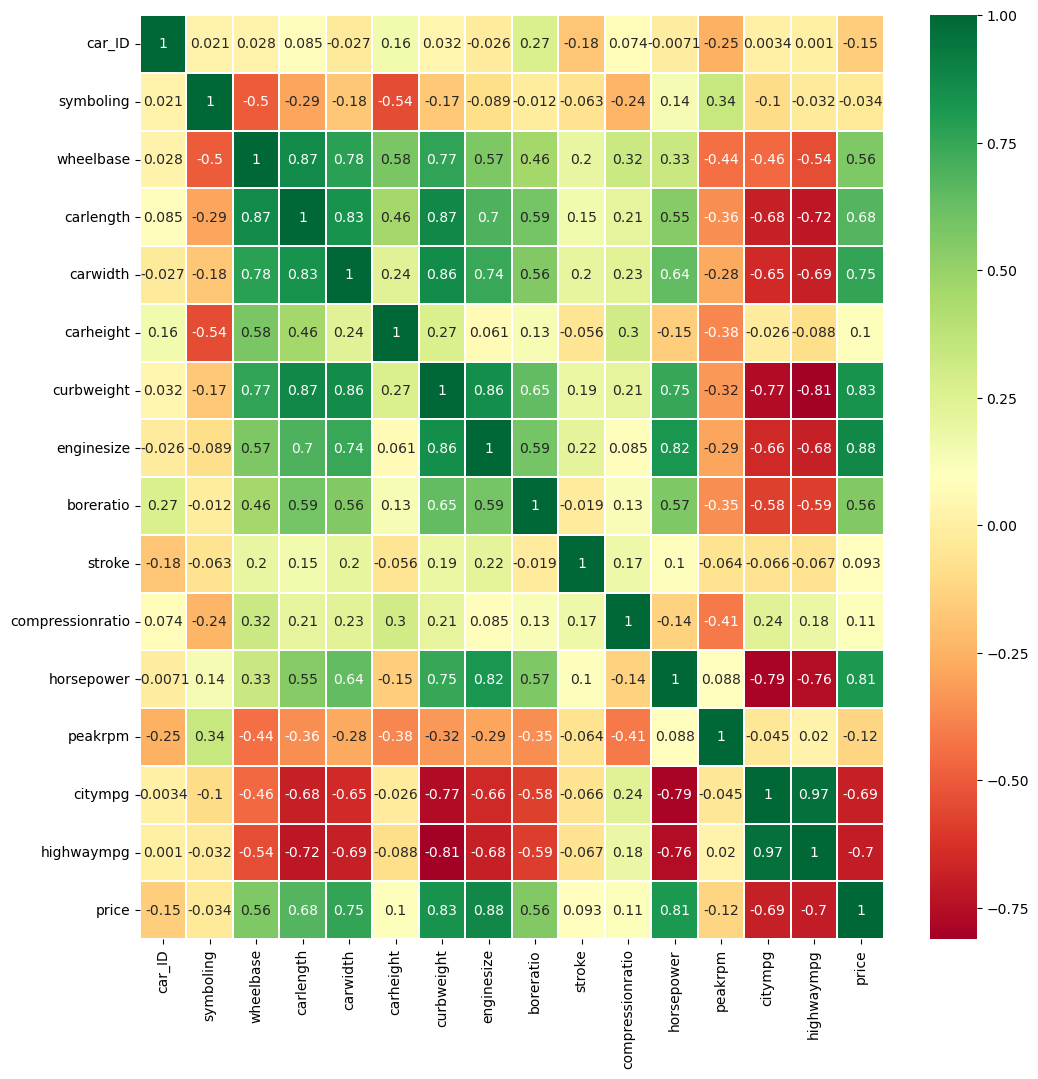

In [3]:
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(12,12)

In [4]:
# извлекаем переменные, которые нам будут интересны для построения графиков
serial = dataset['car_ID'].values
mean_horsepower = dataset['horsepower'].values
mean_wheelbase = dataset['wheelbase'].values
carwidth = dataset['carwidth'].values
price = dataset['price'].values

(array([36., 39., 24., 16., 11., 18., 12.,  3.,  1.,  2.,  1.,  2.,  1.,
         4.,  3.,  4.,  0.,  2.,  0.,  1.]),
 array([ 5118. ,  7132.1,  9146.2, 11160.3, 13174.4, 15188.5, 17202.6,
        19216.7, 21230.8, 23244.9, 25259. , 27273.1, 29287.2, 31301.3,
        33315.4, 35329.5, 37343.6, 39357.7, 41371.8, 43385.9, 45400. ]),
 <BarContainer object of 20 artists>)

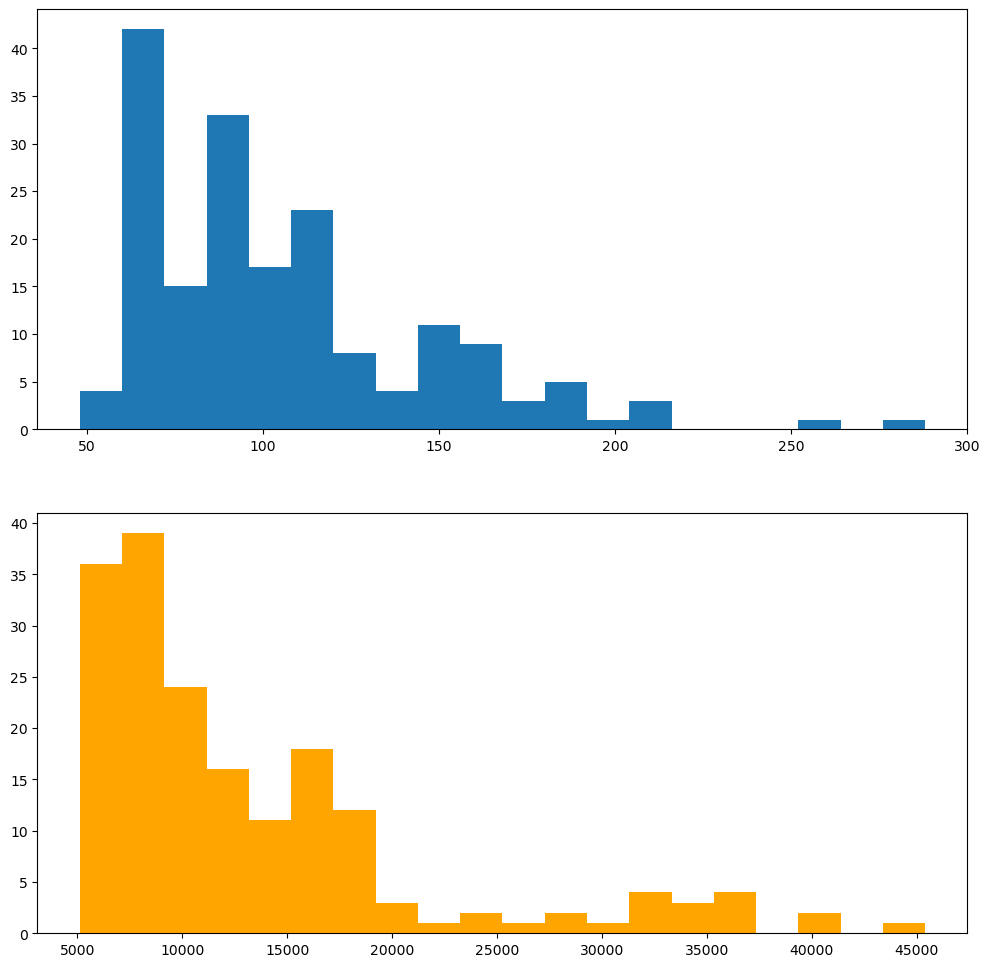

In [5]:
f_hist, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (12,12))
ax1.hist(mean_horsepower, bins=20)
ax2.hist(price, bins=20, color='orange')

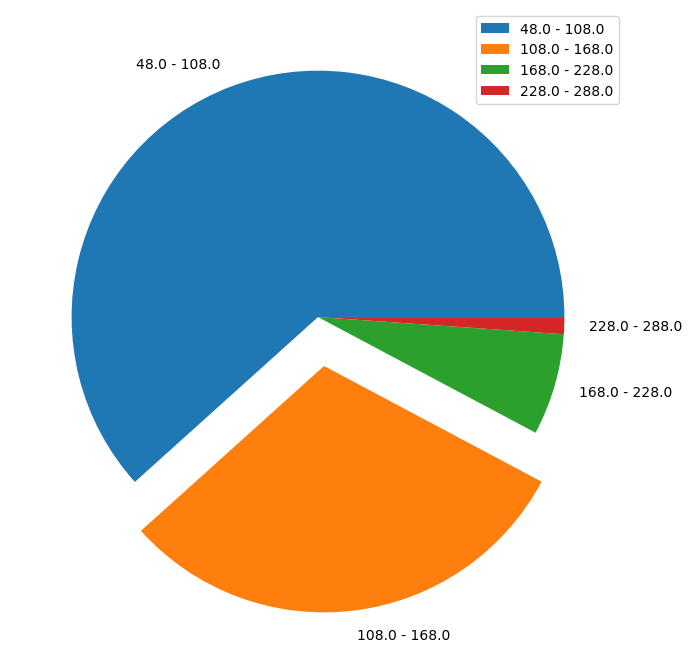

In [6]:
import numpy as np
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8, 8))
counts, ranges = np.histogram(mean_horsepower, 4)
ranges = [f'{ranges[i]} - {ranges[i+1]}' for i in range(0, len(ranges) - 1)]
ax.pie(counts, labels=ranges, shadow=False, explode=[0, 0.2, 0.0, 0.0])
ax.legend()

<BarContainer object of 5 artists>

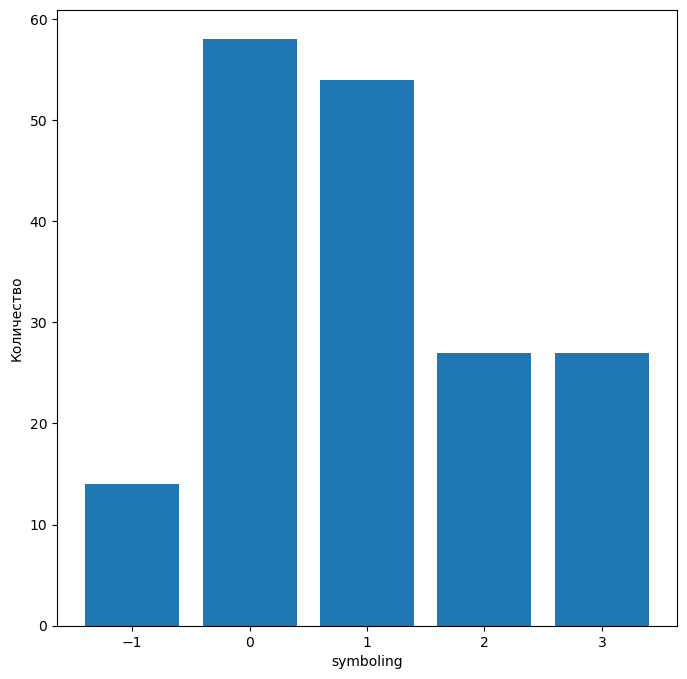

In [7]:
# Барный график

d = dataset.groupby('symboling', sort=True).size().sort_values(ascending = False)
#строим график
plt.figure(figsize=(8,8))
plt.xlabel('symboling')
plt.ylabel('Количество')
plt.bar(d.index, d.values)

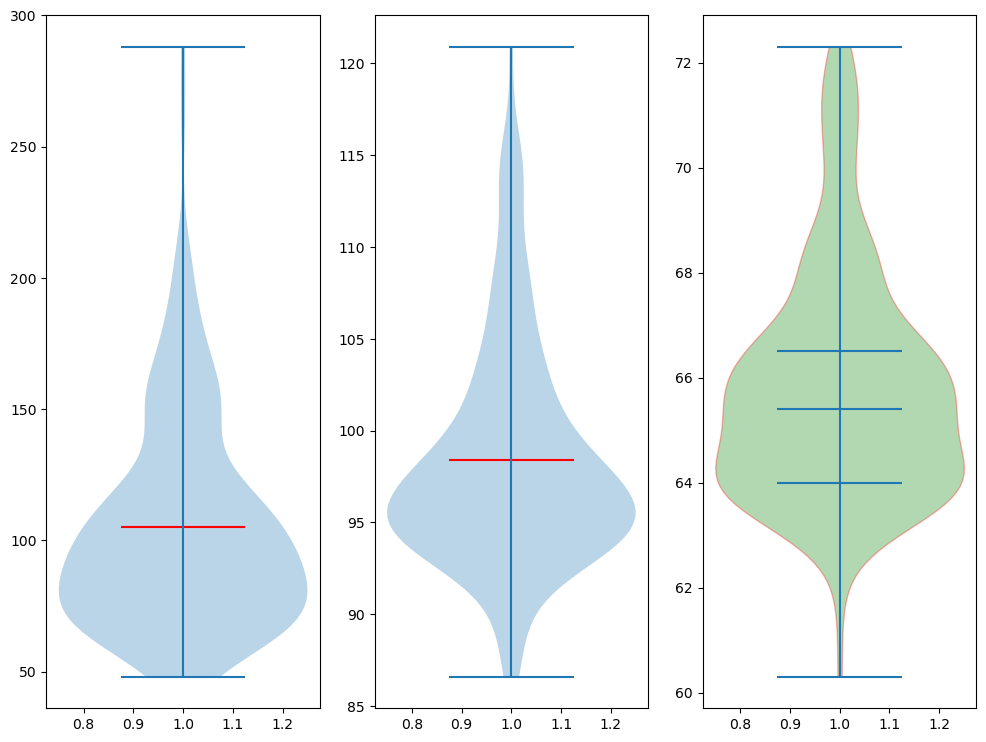

In [8]:
# построим скрипичные диаграммы
f_hist, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (12,9))
v1 = ax1.violinplot(mean_horsepower, showmeans=True)
v1['cmeans'].set_edgecolor('red')
v2 = ax2.violinplot(mean_wheelbase, showmeans=True)
v2['cmeans'].set_edgecolor('red')
v3 = ax3.violinplot(carwidth, quantiles=[0.25, 0.5, 0.75])
v3['bodies'][0].set_facecolor('green')
v3['bodies'][0].set_edgecolor('red')
plt.show()

In [9]:
from plotly.offline import download_plotlyjs, plot, iplot
import plotly.graph_objs as go

series = []
for t in dataset.columns.drop(['car_ID']):
    series.append(dataset[t])

IndexError: index 14 is out of bounds for axis 0 with size 14

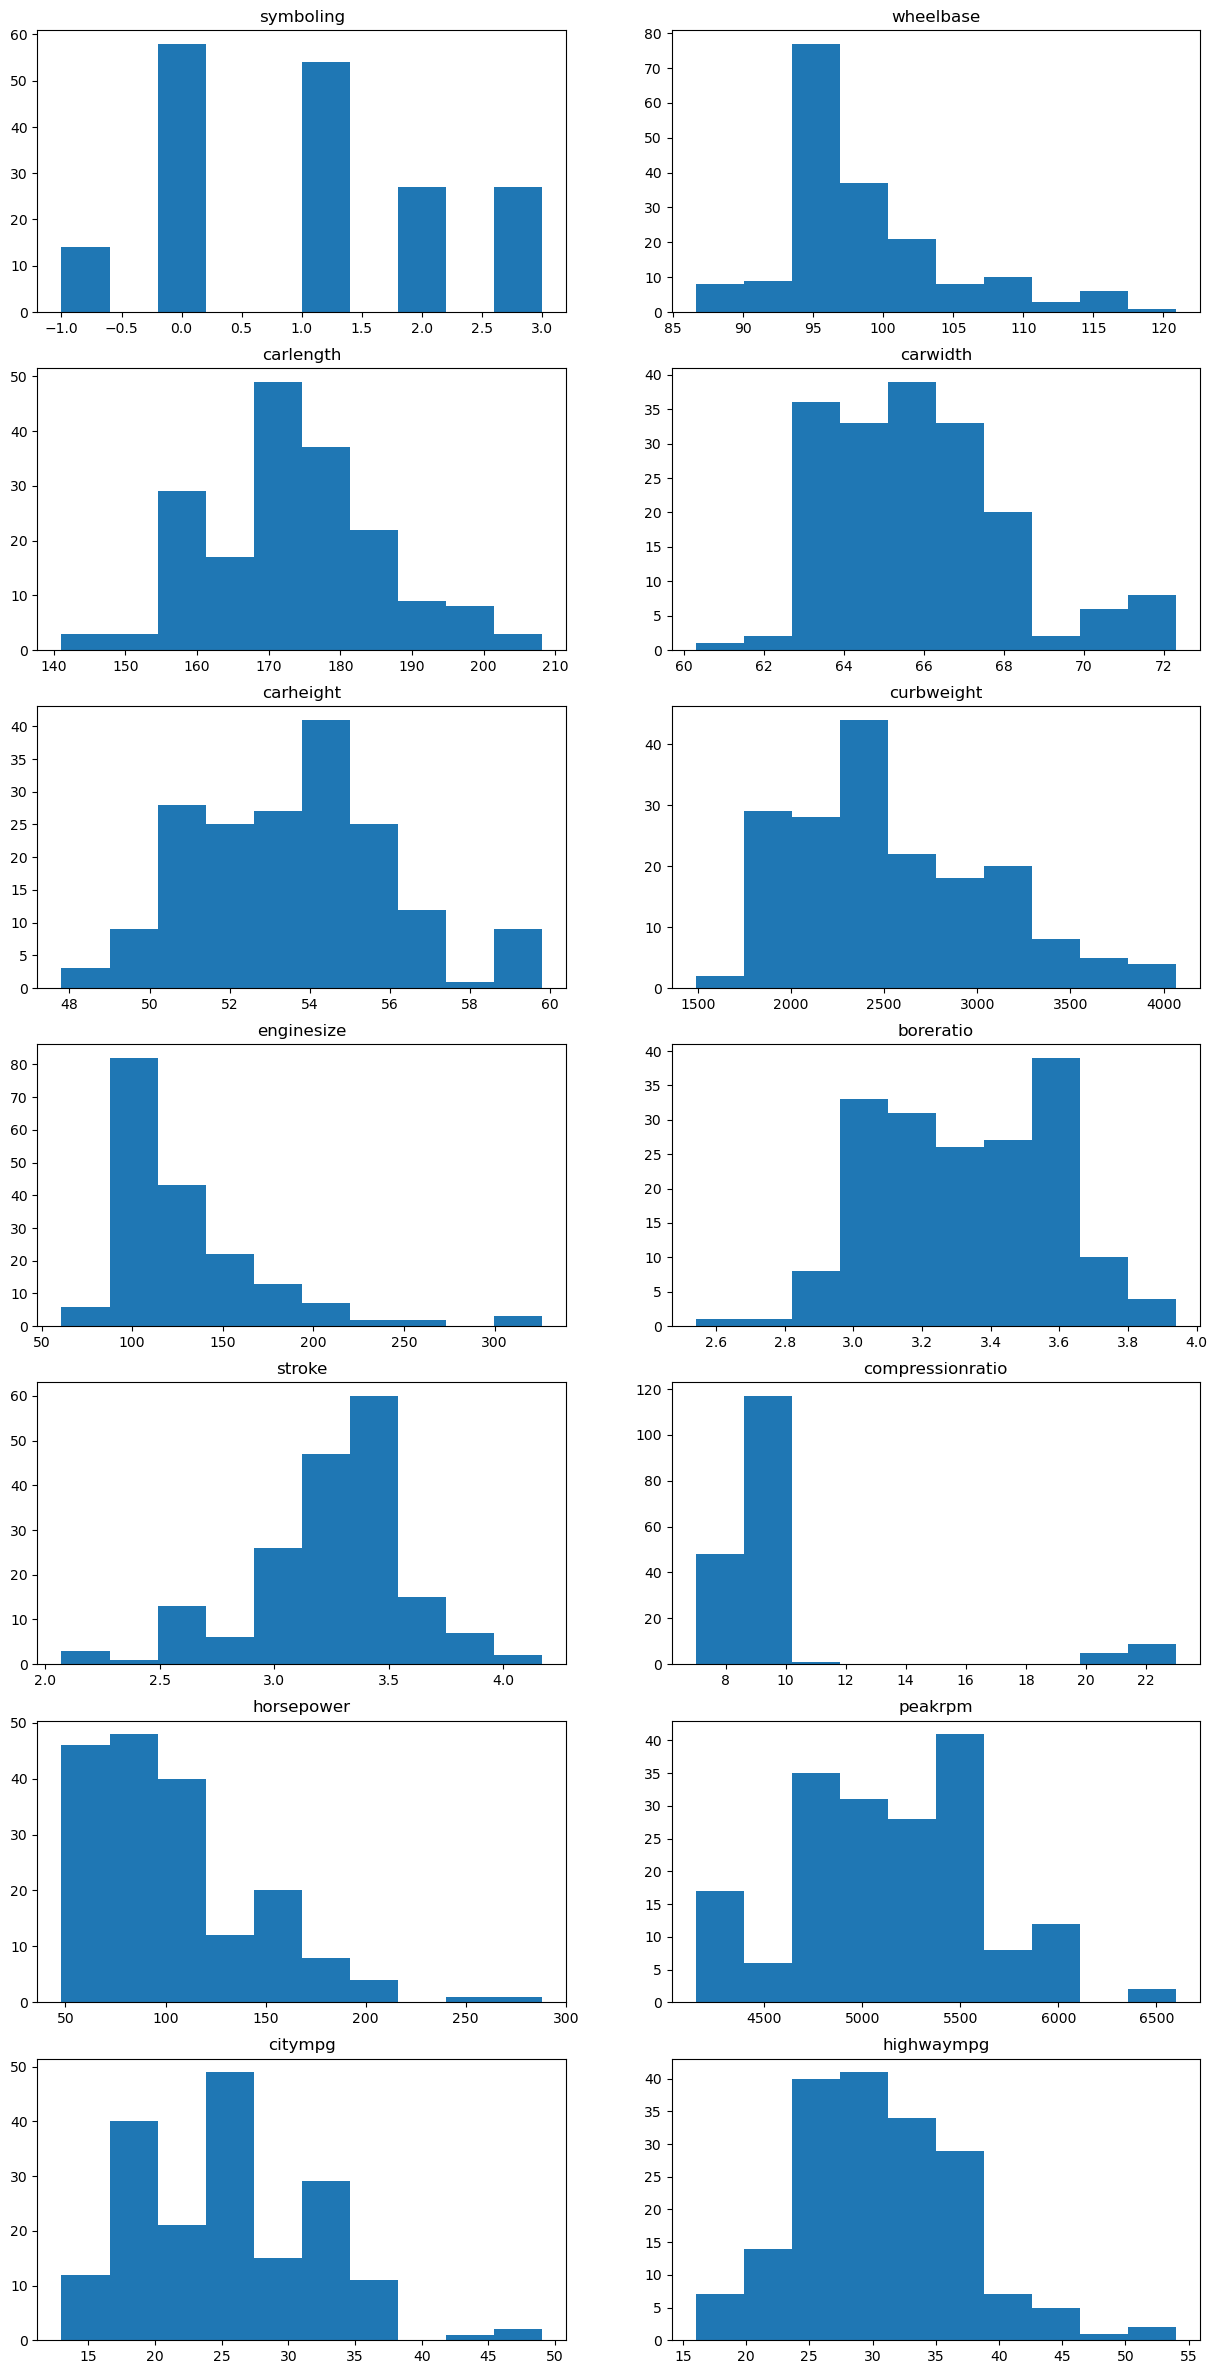

In [10]:
f_hist, axes = plt.subplots(nrows = len(series) // 2, ncols = 2, figsize = (len(series), len(series) * 2))
axes = axes.flatten()
for i, s in enumerate(series):
    axes[i].set_title(s.name)
    axes[i].hist(s, 10)

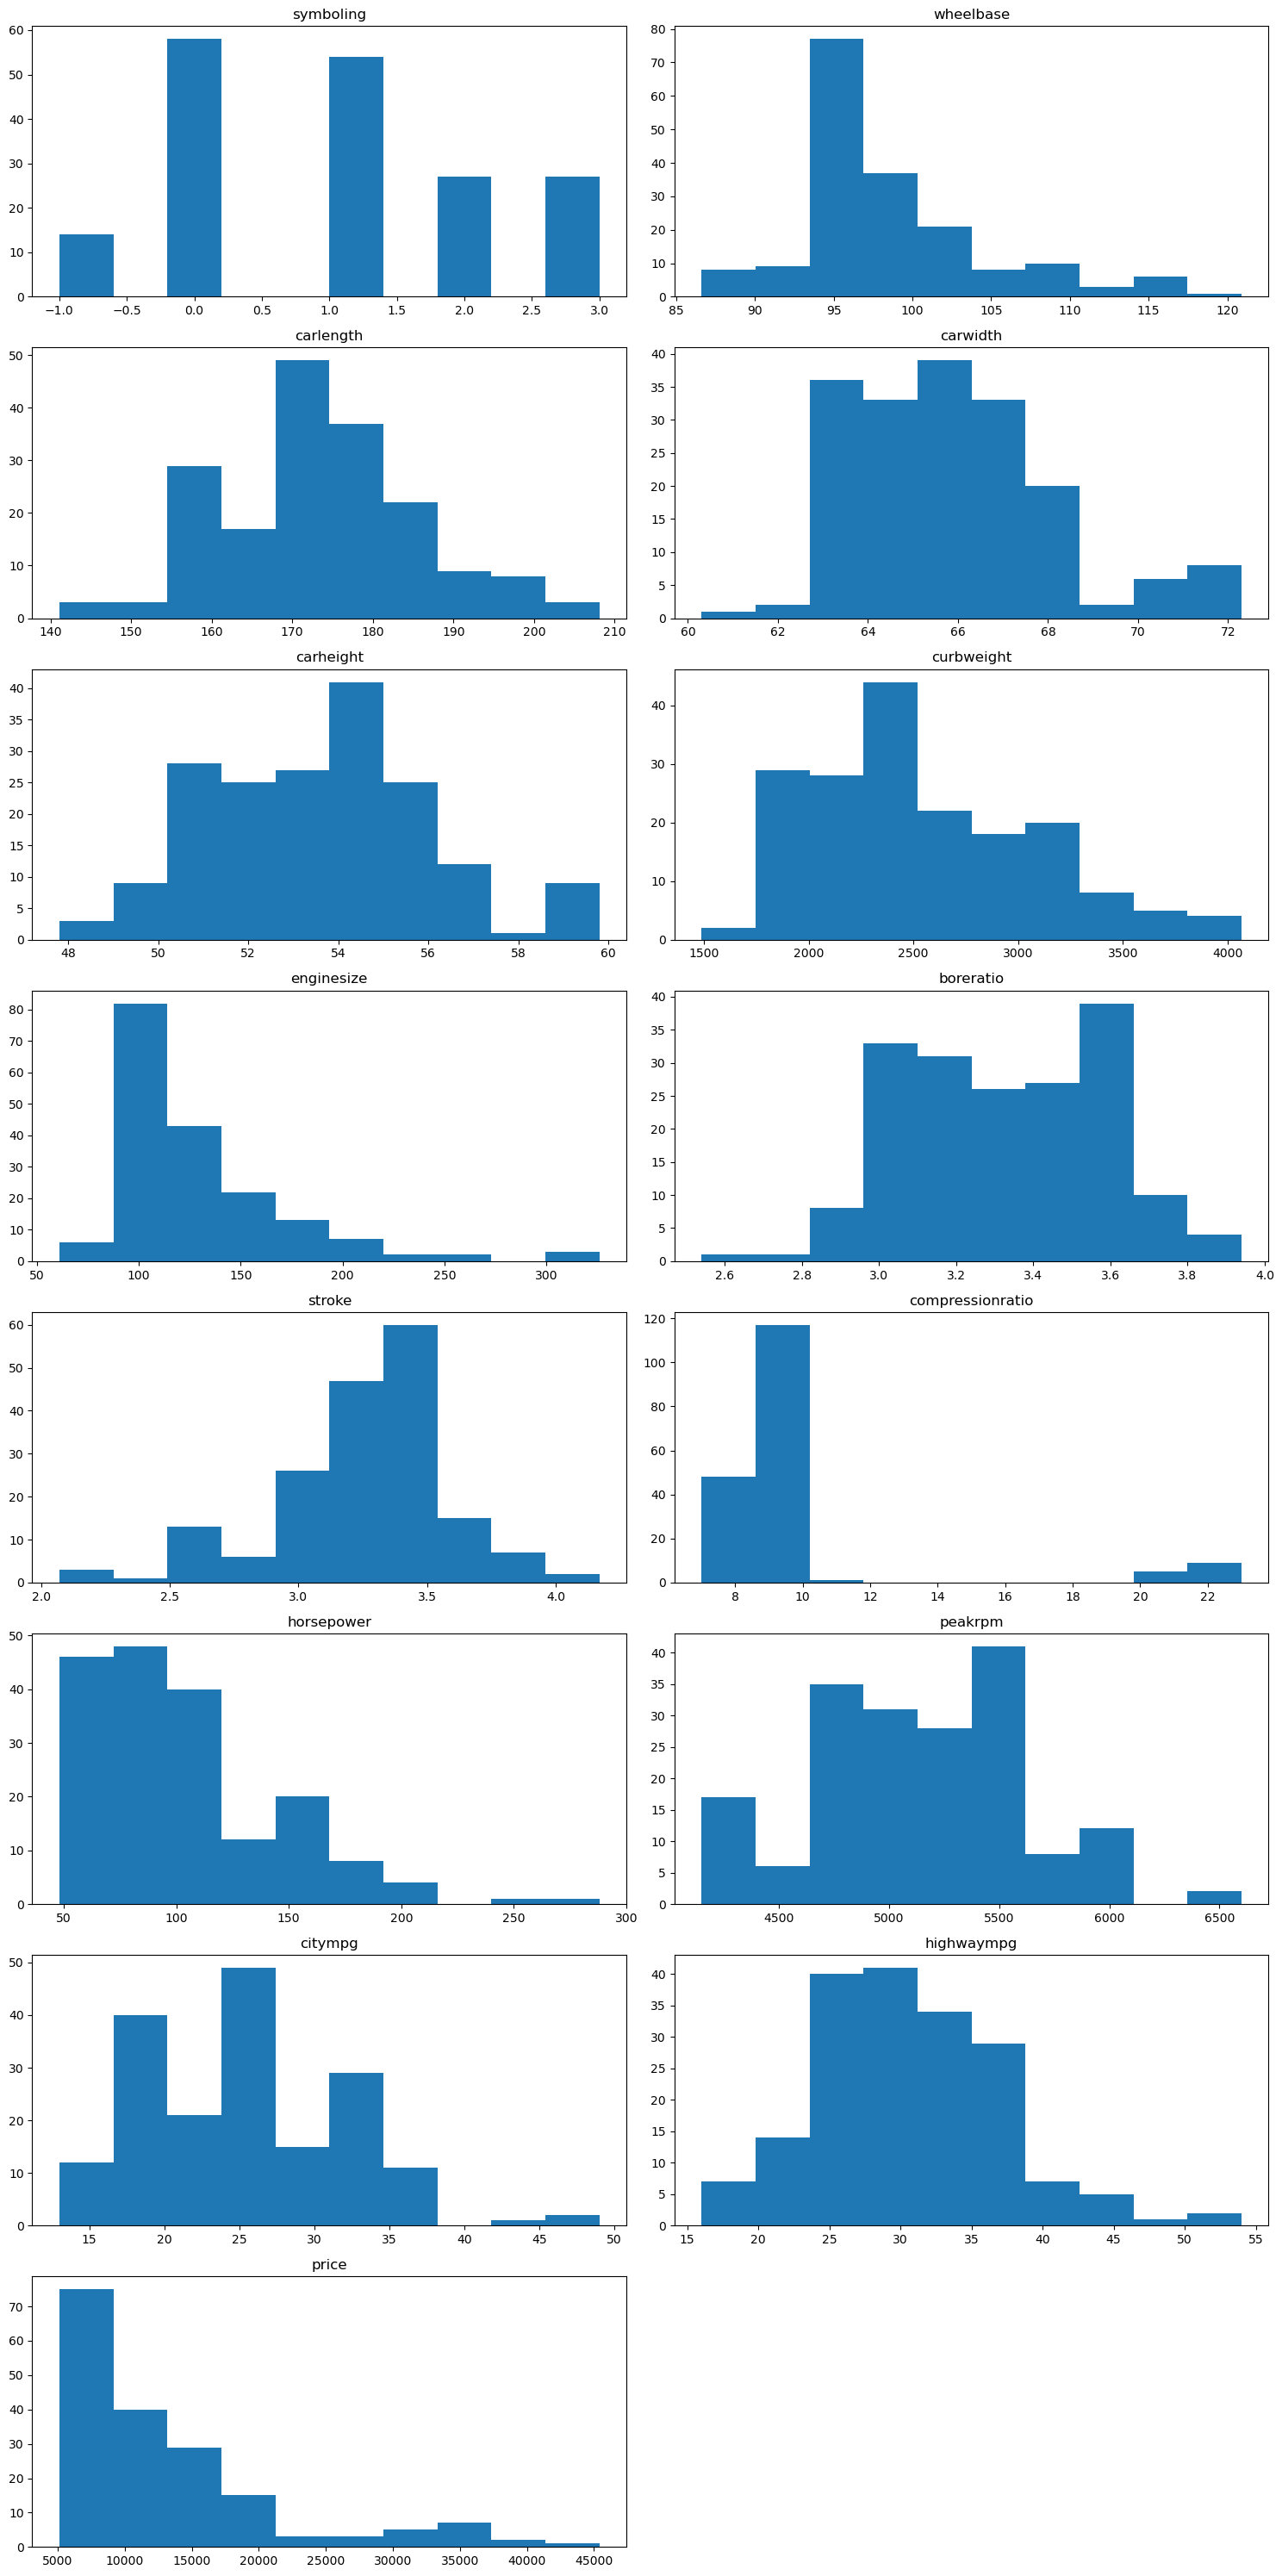

In [19]:
nrows = len(series) // 2 + len(series) % 2  # Add 1 row if the number of series is odd
ncols = 2

f_hist, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(len(series), len(series) * 2))
axes = axes.flatten()

for i, s in enumerate(series):
    axes[i].set_title(s.name)
    axes[i].hist(s, 10)

    # Если создано больше подзаголовков, чем необходимо, спрячьте пустые
for j in range(len(series), len(axes)):
    f_hist.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

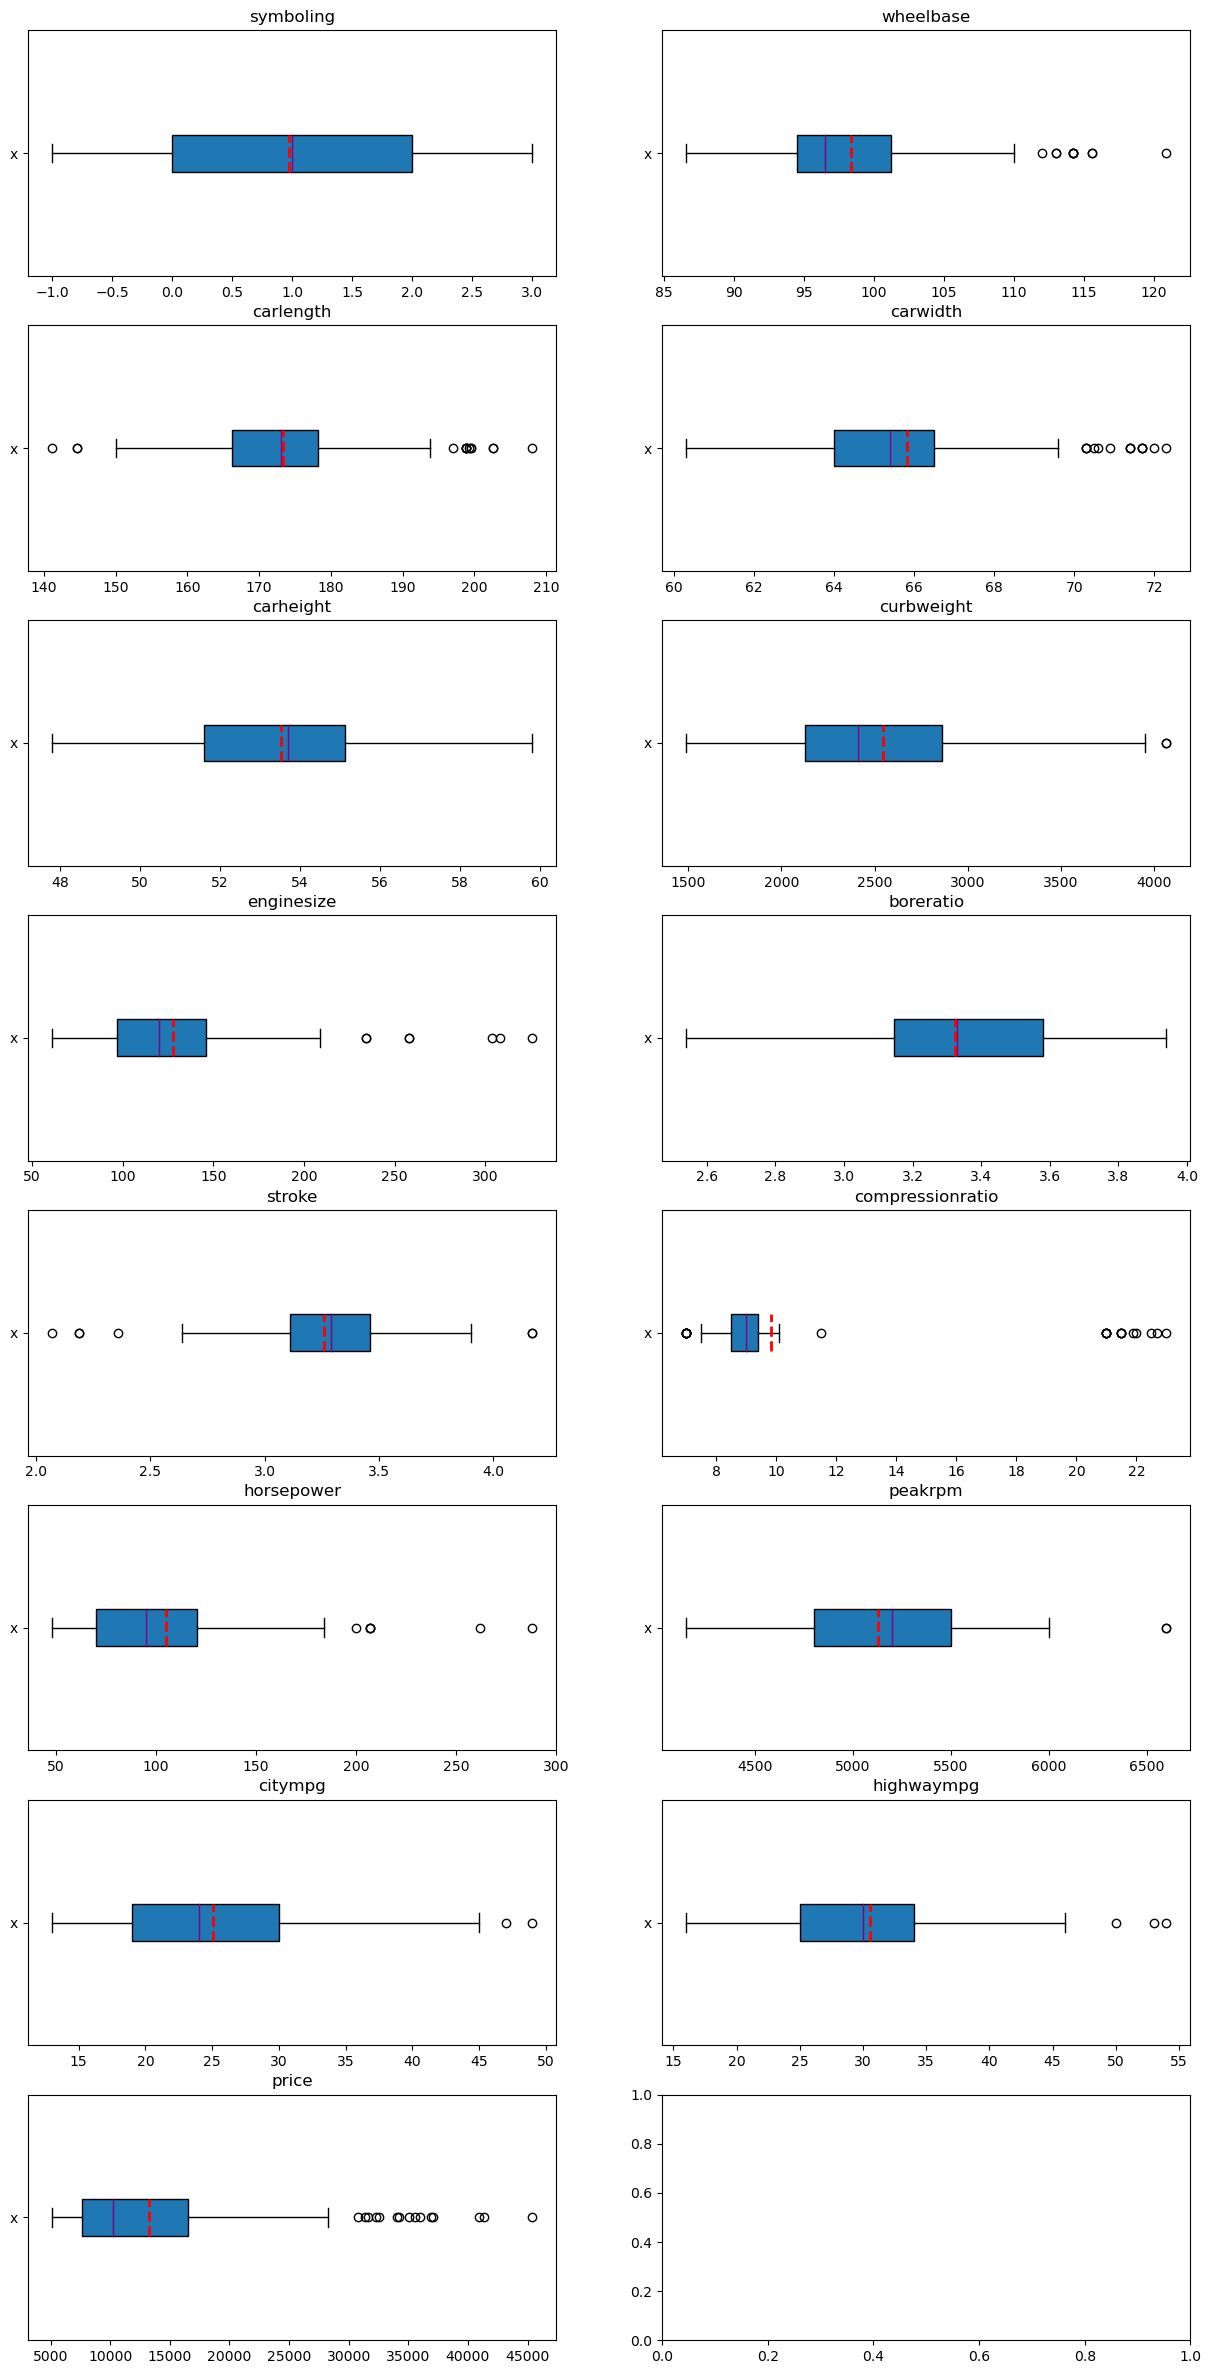

In [17]:
f_hist, axes = plt.subplots(nrows = (len(series) + 1) // 2, ncols = 2, figsize = (len(series), len(series) * 2))
axes = axes.flatten()
for i, s in enumerate(series):
    axes[i].set_title(s.name)
    axes[i].boxplot(x=s, vert=False, showmeans=True, meanline=True, labels=('x'), patch_artist=True, medianprops={'linewidth': 1, 'color': 'purple'}, meanprops={'linewidth': 2, 'color': 'red'})

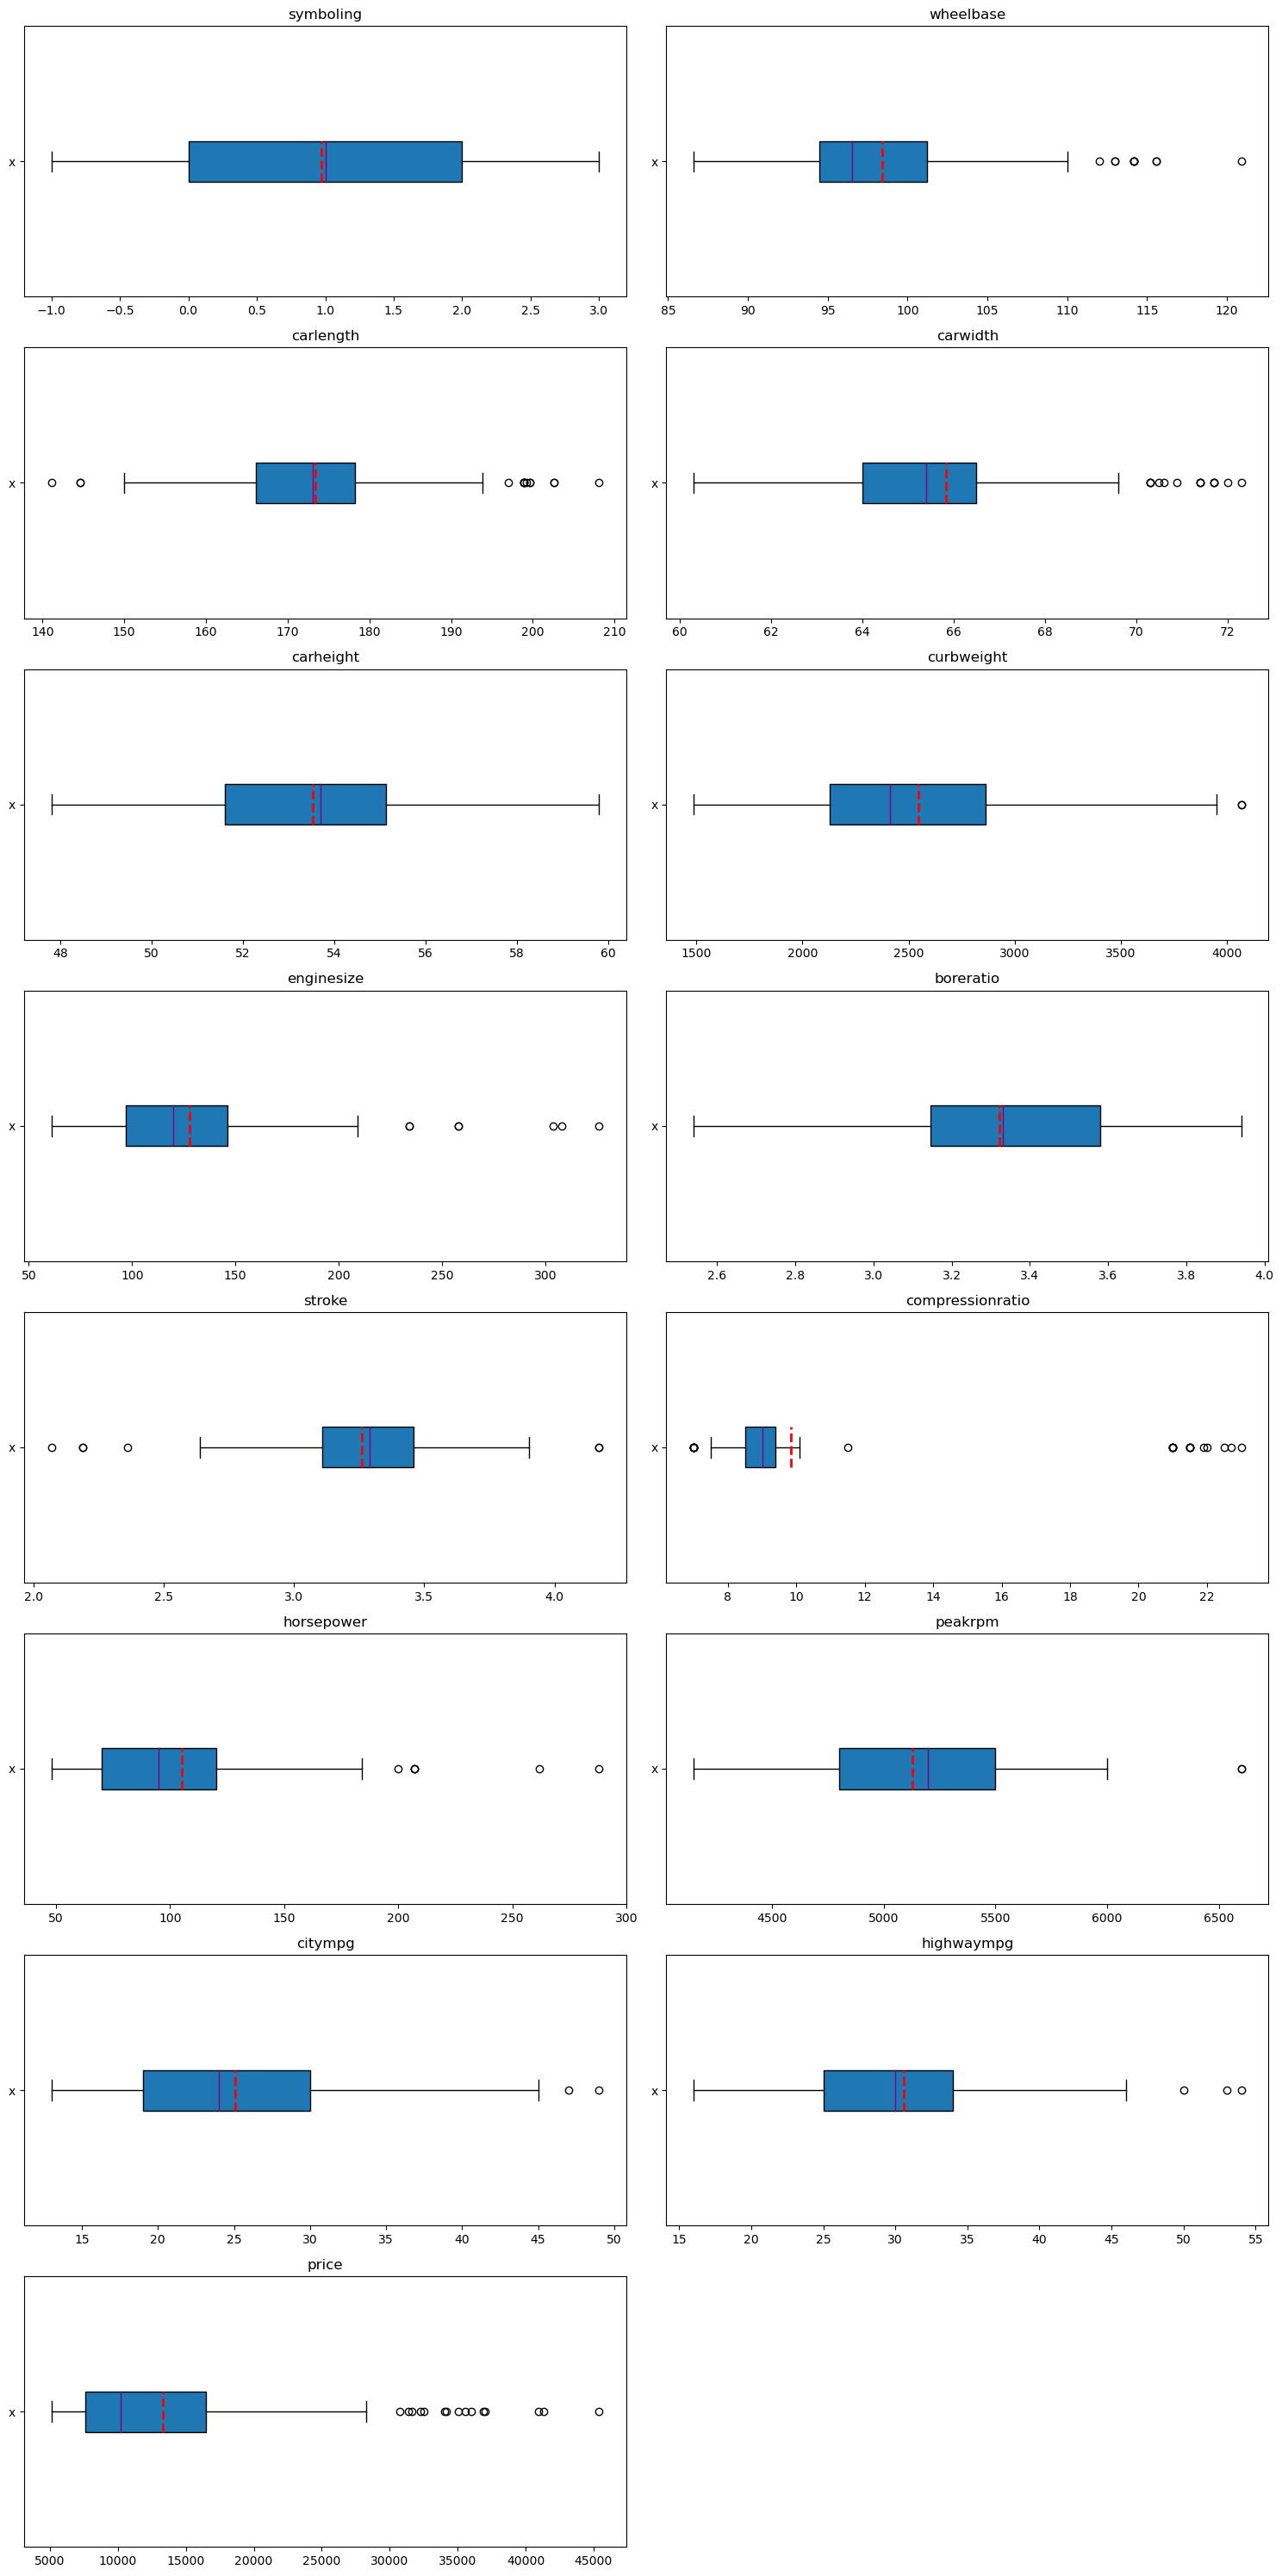

In [14]:
f_hist, axes = plt.subplots(nrows=(len(series) + 1) // 2, ncols=2, figsize=(len(series), len(series) * 2))
axes = axes.flatten()

for i, s in enumerate(series):
    axes[i].set_title(s.name)
    axes[i].boxplot(x=s, vert=False, showmeans=True, meanline=True, labels=('x'), patch_artist=True, medianprops={'linewidth': 1, 'color': 'purple'}, meanprops={'linewidth': 2, 'color': 'red'})

# Если создано больше подзаголовков, чем необходимо, спрячьте пустые
for j in range(len(series), len(axes)):
    f_hist.delaxes(axes[j])

plt.tight_layout()
plt.show()

На диаграммах, помимо признаков "Возраст" и "Звонки в другие страны", наблюдаем множественные выбросы, которые, весьма вероятно, обусловлены не столько ошибкой сбора данных, сколько особенностью предметной области.